### Context
Melbourne real estate is BOOMING. Can you find the insight or predict the next big trend to become a real estate mogul… or even harder, to snap up a reasonably priced 2-bedroom unit?

### Content
This is a snapshot of a dataset created by Tony Pino.

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

#### Notes on Specific Variables
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

### Acknowledgements
Dataset link: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

files = []
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        
print(files)

['data/melb_data.csv']


In [4]:
df = pd.read_csv(files[0])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.shape

(13580, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
print(f'{("Column Name").rjust(15)}   {"#NaNs": <8} {"NaNs Mean": <10} {"#Unique Values"}')
for column in df.columns:
    uv = df[column].unique()
    if len(uv)>12: uv=""
        
    print(f'{(column).rjust(15)}   {str(df[column].isnull().sum()): <8} {str(round(df[column].isnull().mean(), 4)): <10} {len(df[column].unique())}\t\t{str(uv): <10}')

    Column Name   #NaNs    NaNs Mean  #Unique Values
         Suburb   0        0.0        314		          
        Address   0        0.0        13378		          
          Rooms   0        0.0        9		[ 2  3  4  1  6  5  8  7 10]
           Type   0        0.0        3		['h' 'u' 't']
          Price   0        0.0        2204		          
         Method   0        0.0        5		['S' 'SP' 'PI' 'VB' 'SA']
        SellerG   0        0.0        268		          
           Date   0        0.0        58		          
       Distance   0        0.0        202		          
       Postcode   0        0.0        198		          
       Bedroom2   0        0.0        12		[ 2.  3.  4.  1.  6.  5.  0.  8.  9.  7. 20. 10.]
       Bathroom   0        0.0        9		[1. 2. 3. 4. 0. 7. 5. 6. 8.]
            Car   62       0.0046     12		[ 1.  0.  2.  6.  5.  4.  3.  8.  7.  9. 10. nan]
       Landsize   0        0.0        1448		          
   BuildingArea   6450     0.475      603		          
      YearBu

In [8]:
import matplotlib.pyplot as plt

def how_many_in_cat_plot(df, variable, color, a, i):
    ax = plt.subplot(5, 3, (i+1))
    ax.tick_params(labelrotation=15)
    #df[variable].hist(ax = ax)
    plt.hist(df[variable], facecolor = color, alpha=a)
    plt.title(variable)

In [9]:
import matplotlib.pyplot as plt

def df_hist_plot(df, variable, nbins, color, a,i):
    ax = plt.subplot(6, 3, (i+1))
    ax.tick_params(labelrotation=15)    
    df[variable].hist(color=color, alpha=a)
    plt.title(variable)

In [10]:
import seaborn as sns
import scipy.stats as stat, pylab

def df_snsdist_plot(df, variable):
    ax = plt.subplot(6, 3, (i+1))
    ax.tick_params(labelrotation=15)
    ax1 = sns.distplot(df[feature], fit=stat.norm)
    plt.title(variable)

In [11]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

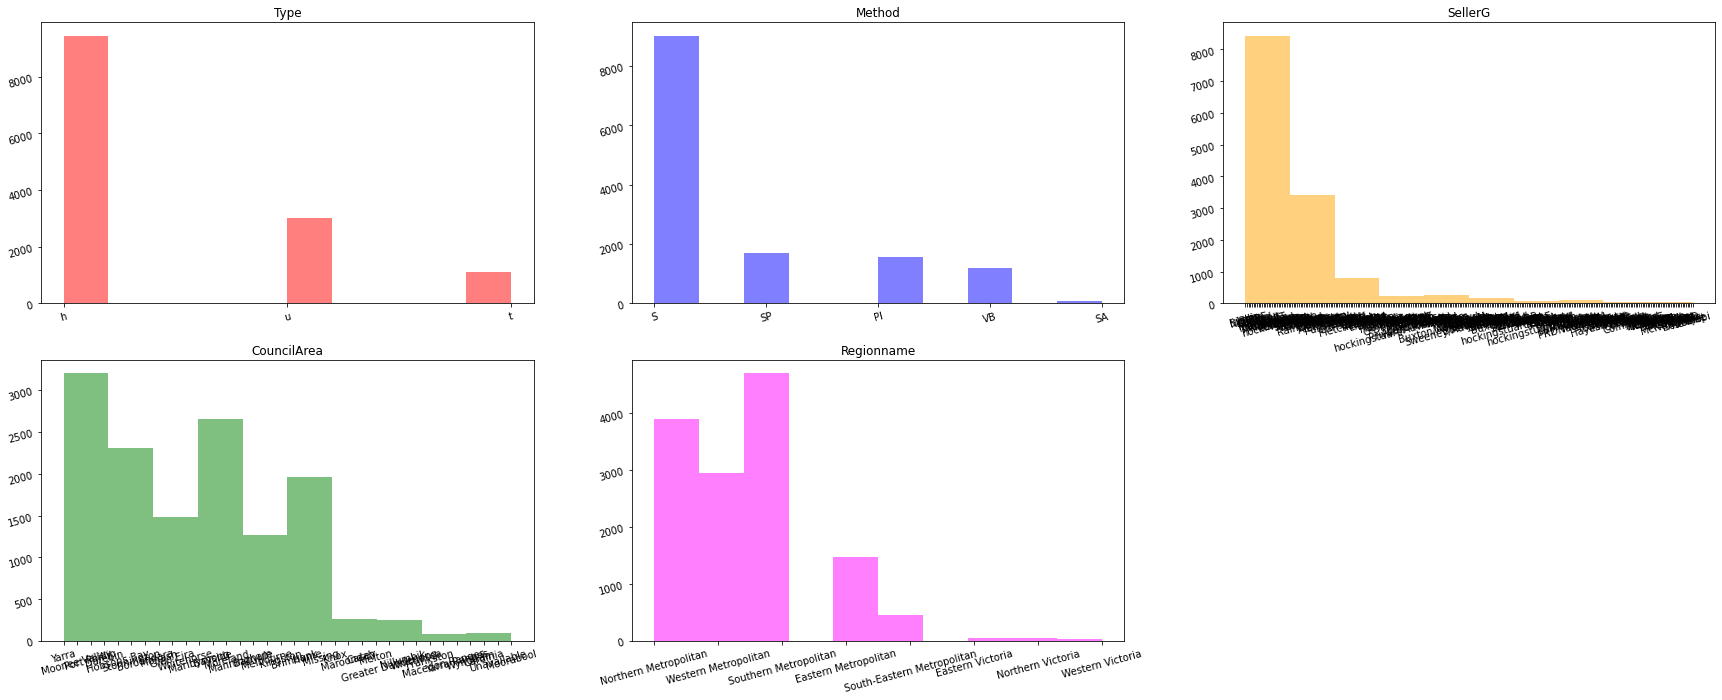

In [12]:
colors = ['red', 'blue', 'orange', 'green', 'magenta', 'pink', 'black', 'grey']
fig = plt.figure(figsize = (30,30))
temp_df = df[df.columns].copy(deep=True)

for i, feature in enumerate(['Type', 'Method', 'SellerG','CouncilArea', 'Regionname']):
    
    # Replace NAN with Missing
    temp_df[feature] = df[feature].fillna('Missing')
    temp_df[feature] = temp_df[feature].astype(str)
    how_many_in_cat_plot(temp_df, feature, colors[i%len(colors)], 0.5, i)
    
plt.show()

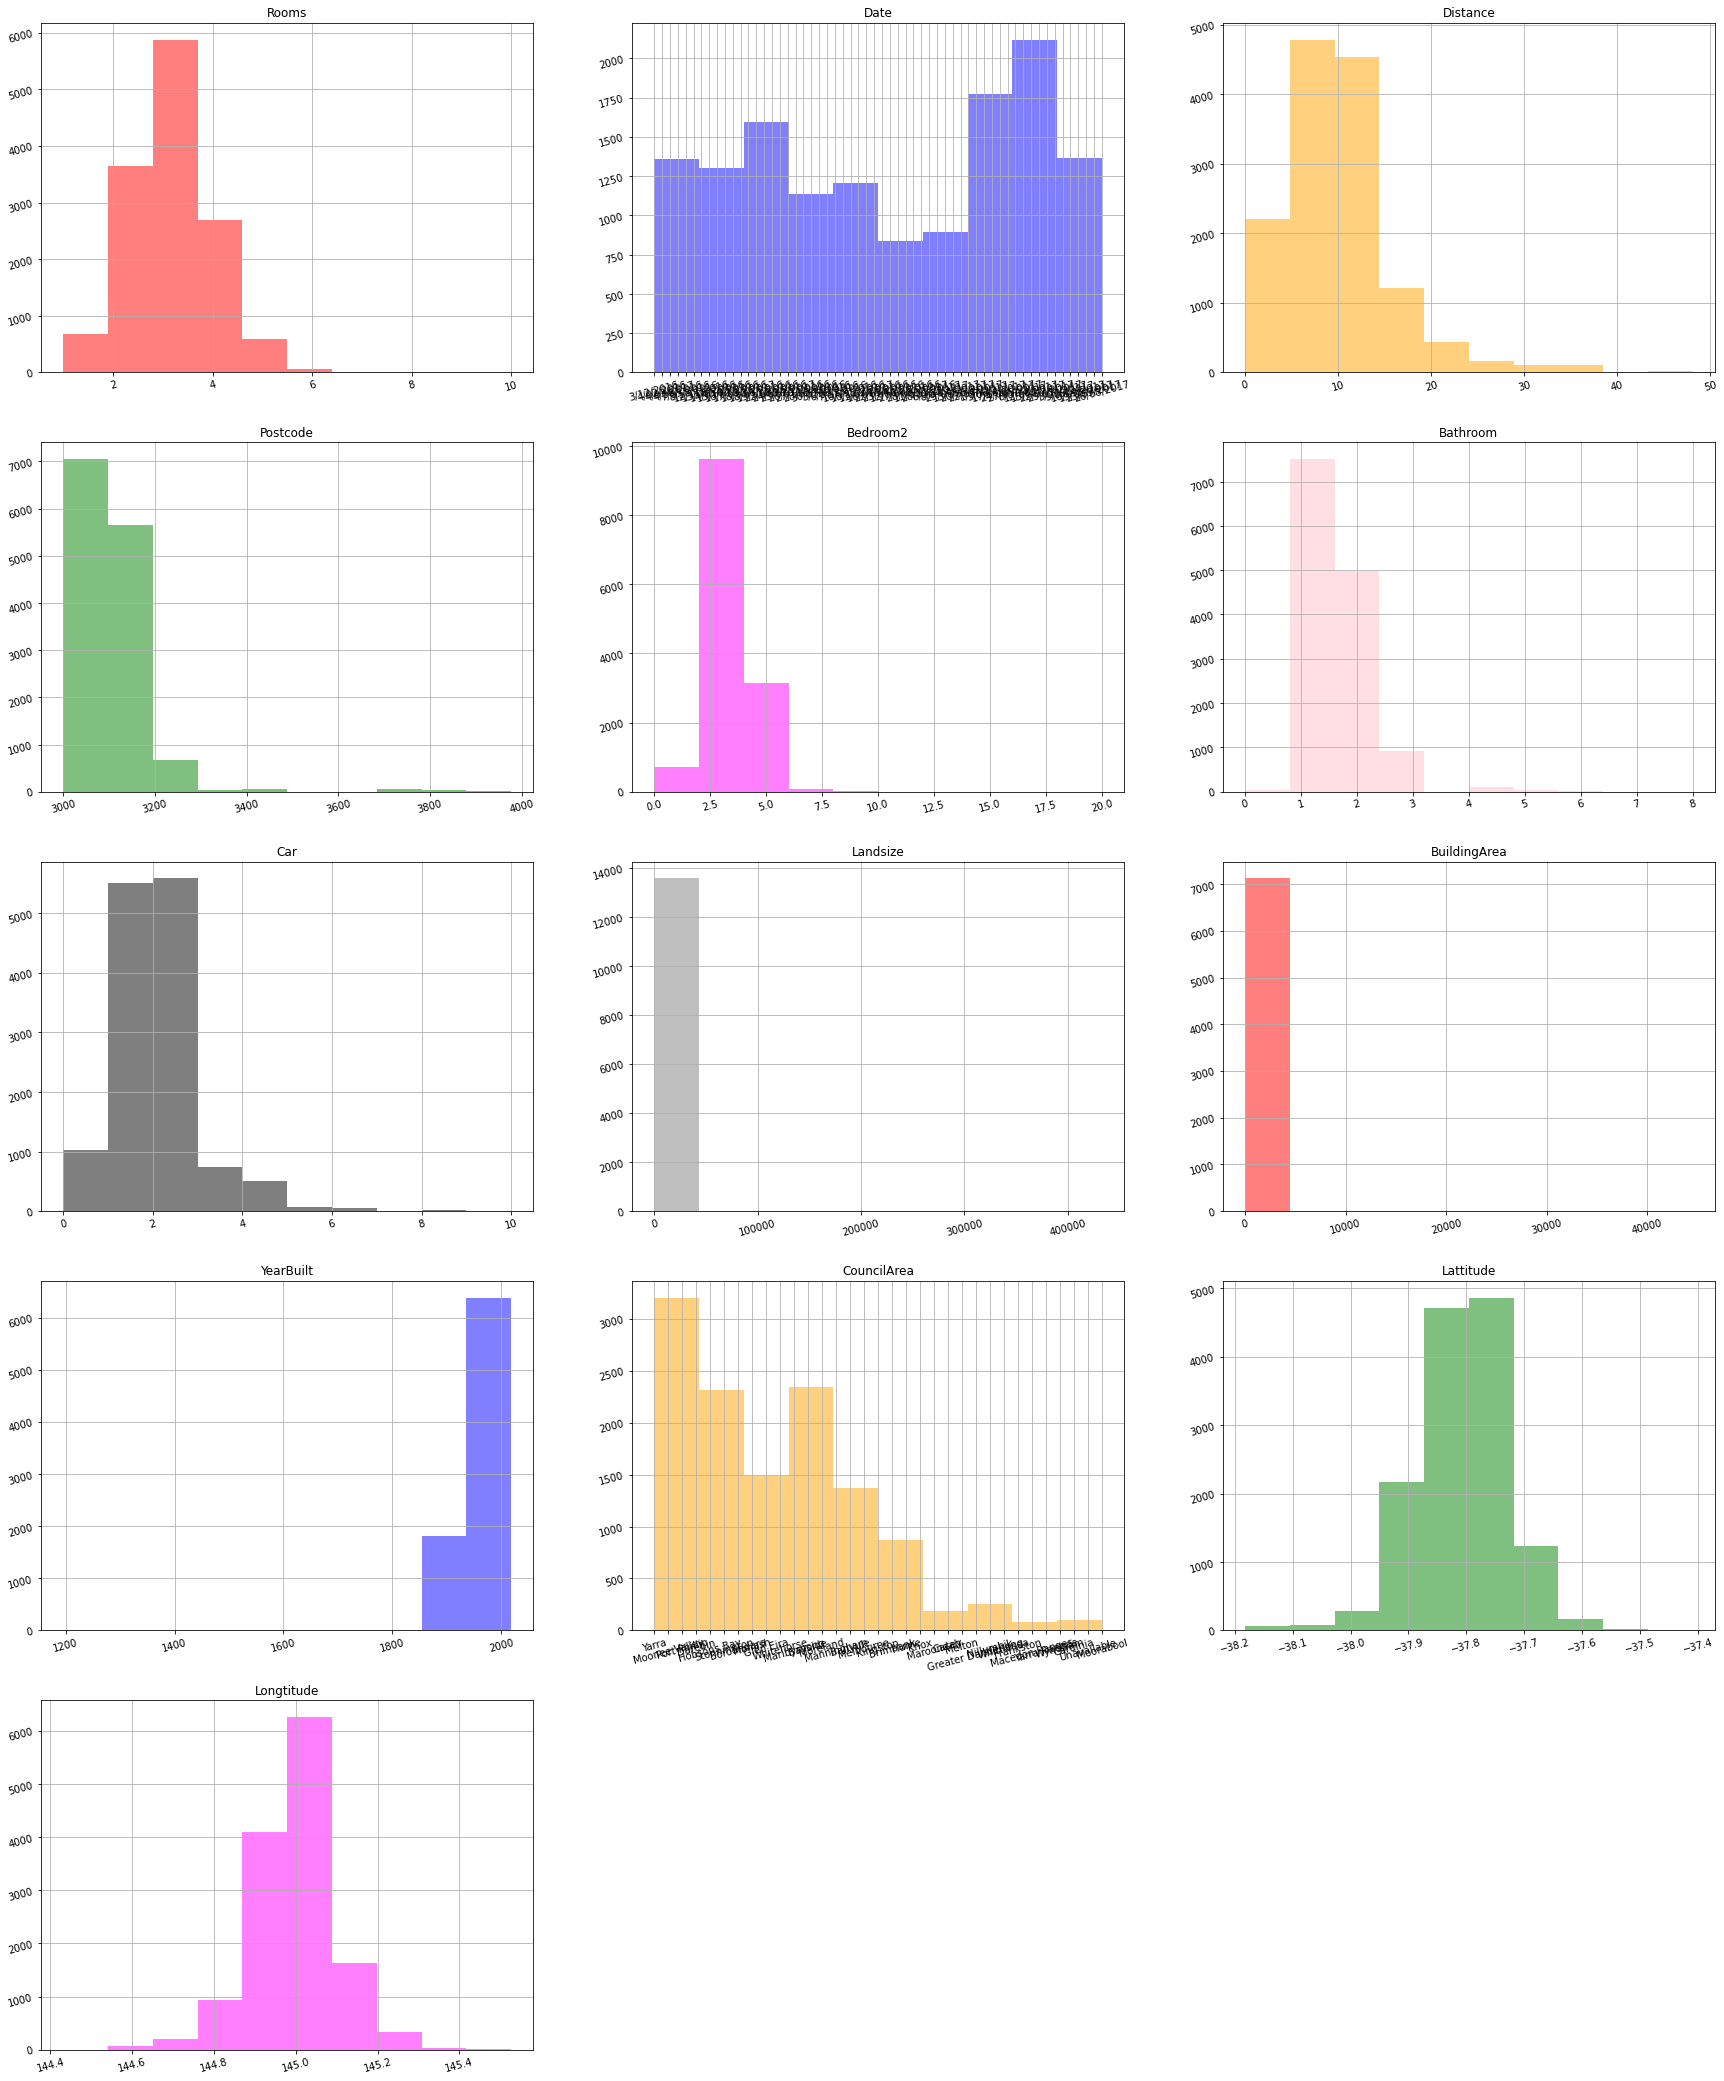

In [13]:
colors = ['red', 'blue', 'orange', 'green', 'magenta', 'pink', 'black', 'grey']
col_list = ['Rooms', 'Date', 'Distance', 'Postcode','Bedroom2', 'Bathroom', 'Car','Landsize', 
            'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude']
fig = plt.figure(figsize = (30,45))
for i, feature in enumerate(col_list):
    df_hist_plot(df, feature, 30, colors[i%len(colors)],0.5, i)
    

/home/sinjoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sinjoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sinjoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

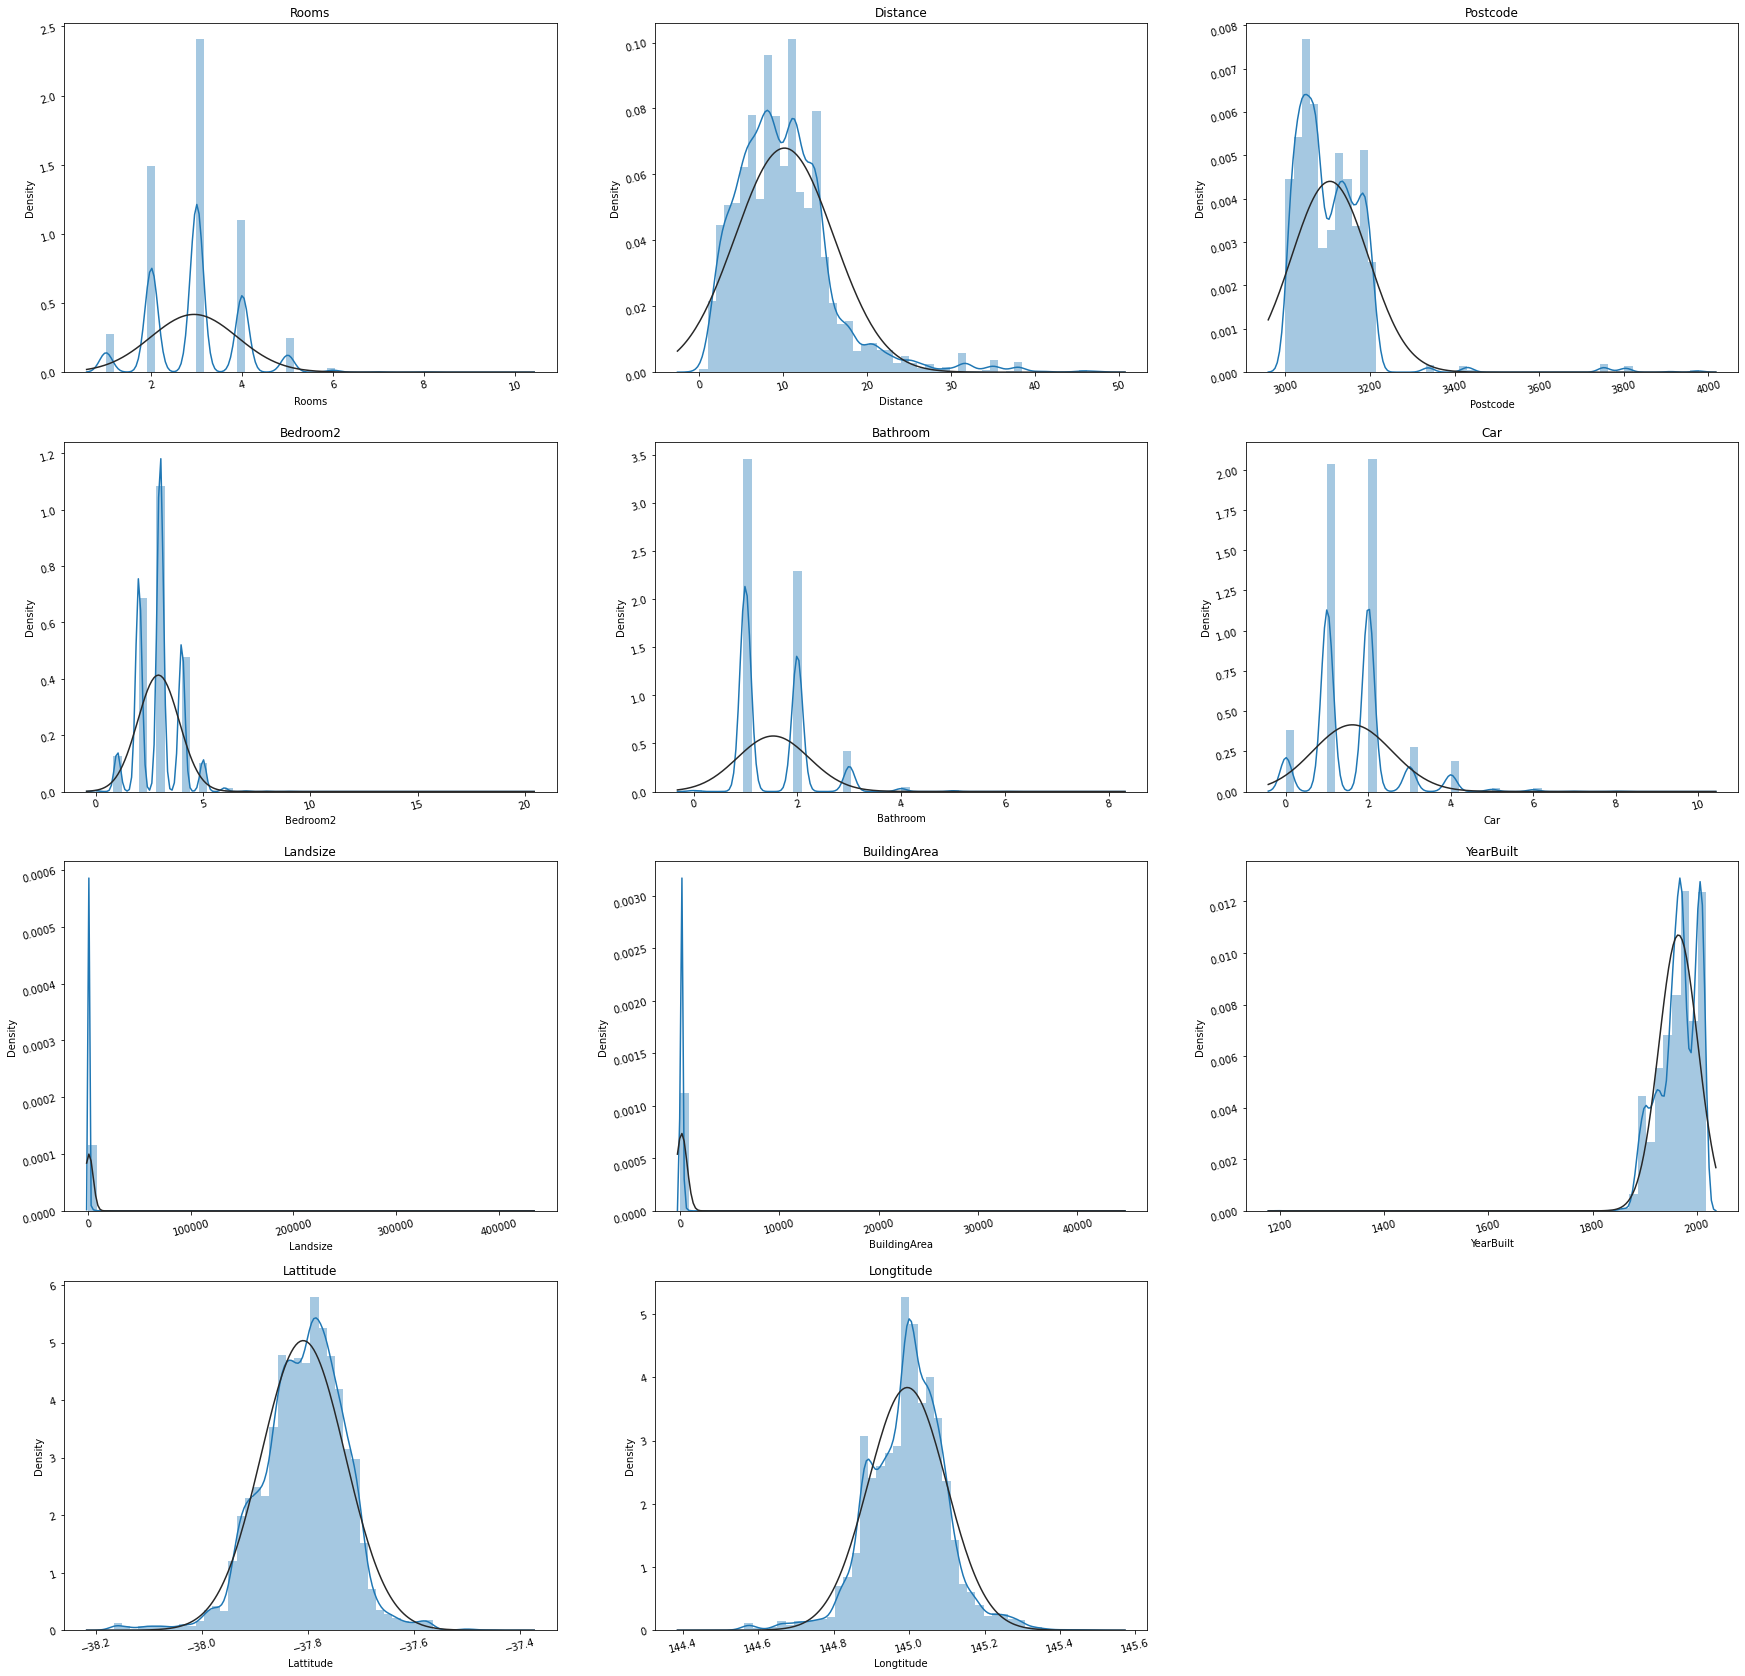

In [14]:
colors = ['red', 'blue', 'orange', 'green', 'magenta', 'pink', 'black', 'grey']
col_list = ['Rooms', 'Distance', 'Postcode','Bedroom2', 'Bathroom', 'Car','Landsize', 
            'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
fig = plt.figure(figsize = (30,45))
for i, feature in enumerate(col_list):
    df_snsdist_plot(df, feature)
    
plt.show()

In [16]:
for feature in ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']:
    print(feature)
    print(df[feature].value_counts())
    print()
    # print(df.groupby(feature)['temp_count'].mean().sort_values(ascending=False))

Suburb
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Attwood             1
Bacchus Marsh       1
Riddells Creek      1
Montrose            1
Healesville         1
Name: Suburb, Length: 314, dtype: int64

Address
5 Charles St        3
5 Margaret St       3
2 Bruce St          3
53 William St       3
28 Blair St         3
                   ..
6/4 Belvedere Cl    1
187 Mascoma St      1
28 Frederick St     1
48 Manson Dr        1
3 Doull Ct          1
Name: Address, Length: 13378, dtype: int64

Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

Type
h    9449
u    3017
t    1114
Name: Type, dtype: int64

Price
1100000.0    113
1300000.0    109
800000.0     109
650000.0     109
600000.0     104
            ... 
1394000.0      1
3210000.0      1
408500.0       1
747500.0       1
902500.0       1
Name: Price, Length: 2204, dty

## Let's make a Final DataFrame

In [17]:
df_final = pd.DataFrame()

Columns to be handled: 

    Column Name   #NaNs    NaNs Mean  #Unique Values
    
         Suburb   0        0.0        314		          
        Address   0        0.0        13378		          
   ~~ Rooms   0        0.0        9		[ 2  3  4  1  6  5  8  7 10] ~~
                
   ~~ Type   0        0.0        3		['h' 'u' 't'] ~~
    
          Price   0        0.0        2204		          
   
   ~~ Method   0        0.0        5		['S' 'SP' 'PI' 'VB' 'SA'] ~~
   
        SellerG   0        0.0        268		          
           Date   0        0.0        58		          
   ~~ Distance   0        0.0        202 ~~
   
   ~~ Postcode   0        0.0        198	~~
   
   ~~ Bedroom2   0        0.0        12		[ 2.  3.  4.  1.  6.  5.  0.  8.  9.  7. 20. 10.] ~~
   
   ~~  Bathroom   0        0.0        9		[1. 2. 3. 4. 0. 7. 5. 6. 8.] ~~
   
   ~~ Car   62       0.0046     12		[ 1.  0.  2.  6.  5.  4.  3.  8.  7.  9. 10. nan] ~~
   
   **Landsize   0        0.0        1448** (look into this later)
   
   **BuildingArea   6450     0.475      603** (look into this later)
    
   ~~ YearBuilt   5375     0.3958     145 ~~
   
    CouncilArea   1369     0.1008     34		          
      
   ~~ Lattitude   0        0.0        6503	~~
   
  ~~ Longtitude   0        0.0        7063	
  
  ~~ Regionname   0        0.0        8		['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
                                            'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
                                            'Northern Victoria' 'Western Victoria'] ~~
                                            
   ~~ Propertycount   0        0.0        311 ~~

### Rooms

In [18]:
df_final['Rooms'] = df['Rooms'].astype(int)
df_final.head()

,Rooms
0,2
1,2
2,3
3,3
4,4


### Type: One-Hot Encoding

In [19]:
df_temp = pd.DataFrame()
df_temp['Type'] = df['Type']
df_temp = pd.get_dummies(df_temp, drop_first=True)
df_temp.head()
df_final[df_temp.columns] = df_temp[df_temp.columns]
df_final.head()

,Rooms,Type_t,Type_u
0,2,0,0
1,2,0,0
2,3,0,0
3,3,0,0
4,4,0,0


### Method

In [20]:
df['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [21]:
df_temp = pd.DataFrame()
df_temp['Method'] = df['Method']
df_temp = pd.get_dummies(df_temp, drop_first=True)
df_temp.head()
df_final[df_temp.columns] = df_temp[df_temp.columns]
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
0,2,0,0,1,0,0,0
1,2,0,0,1,0,0,0
2,3,0,0,0,0,1,0
3,3,0,0,0,0,0,0
4,4,0,0,0,0,0,1


### Distance

In [22]:
df_final['Distance'] = df['Distance']
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance
0,2,0,0,1,0,0,0,2.5
1,2,0,0,1,0,0,0,2.5
2,3,0,0,0,0,1,0,2.5
3,3,0,0,0,0,0,0,2.5
4,4,0,0,0,0,0,1,2.5


### Postcode

In [23]:
n = 20 # 70
count = df['Postcode'].value_counts().nlargest(n)
index = count.index
for i, c in enumerate(count):
    print(index[i], c, round(c/df.shape[0],2), sep='\t')

3073.0	359	0.03
3020.0	306	0.02
3121.0	292	0.02
3040.0	290	0.02
3046.0	284	0.02
3165.0	249	0.02
3058.0	246	0.02
3163.0	245	0.02
3012.0	242	0.02
3072.0	239	0.02
3032.0	236	0.02
3204.0	230	0.02
3056.0	222	0.02
3141.0	202	0.01
3146.0	195	0.01
3011.0	194	0.01
3122.0	191	0.01
3070.0	188	0.01
3015.0	188	0.01
3186.0	186	0.01


#### Let's take only the top 13 Postcodes (more than 1%) and One-Hot Encode them. If all are zeros, it will considered as Other category.

In [24]:
n = 13
count = df['Postcode'].value_counts().nlargest(n)
index = count.index
for i, c in enumerate(count):
    print(index[i], c, round(c/df.shape[0],2), sep='\t')

3073.0	359	0.03
3020.0	306	0.02
3121.0	292	0.02
3040.0	290	0.02
3046.0	284	0.02
3165.0	249	0.02
3058.0	246	0.02
3163.0	245	0.02
3012.0	242	0.02
3072.0	239	0.02
3032.0	236	0.02
3204.0	230	0.02
3056.0	222	0.02


In [25]:
df_temp = pd.DataFrame()
for i in index:
    df_temp['PC_'+str(int(i))] = np.where(df['Postcode']==i, 1, 0)
    
df_temp

,PC_3073,PC_3020,PC_3121,PC_3040,PC_3046,PC_3165,PC_3058,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0,0,0,0,0,0,0,0,0,0,0,0,0
13576,0,0,0,0,0,0,0,0,0,0,0,0,0
13577,0,0,0,0,0,0,0,0,0,0,0,0,0
13578,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_final[df_temp.columns] = df_temp[df_temp.columns]
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3040,PC_3046,PC_3165,PC_3058,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0


### Bedroom2

In [27]:
df_final['Bedroom2'] = df['Bedroom2'].astype(int)
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3046,PC_3165,PC_3058,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056,Bedroom2
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,2
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,3
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,0,3
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,0,0,0,0,0,0,3


### Bathroom

In [28]:
df_final['Bathroom'] = df['Bathroom'].astype(int)
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3165,PC_3058,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056,Bedroom2,Bathroom
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,2,1
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,2,1
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,0,0,0,0,0,3,2
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,0,3,2
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,0,0,0,0,0,3,1


### Car

In [29]:
df['Car'].isnull().sum()

62

In [30]:
df['Car'].isnull().mean()

0.004565537555228277

In [31]:
df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [32]:
print(df['Car'].mean())
print(df['Car'].median())
print(df['Car'].mode()[0])

1.6100754549489569
2.0
2.0


#### Let's impute the NaNs in Car with '2'. Number of NaNs in Car is less than 0.5%

In [33]:
df_final['Car'] = (df['Car'].fillna(df['Car'].median())).astype(int)
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3058,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056,Bedroom2,Bathroom,Car
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,2,1,1
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,2,1,0
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,0,0,0,0,3,2,0
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,0,0,0,0,3,2,1
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,0,0,0,0,3,1,2


### Landsize

In [34]:
print(df[df['Landsize']==0].shape)
df[(df['Landsize'] < df['BuildingArea'])]

(1939, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
23,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,18/06/2016,2.5,3067.0,...,1.0,1.0,0.0,60.0,1970.0,Yarra,-37.80150,144.99720,Northern Metropolitan,4019.0
24,Abbotsford,52a William St,2,h,1100000.0,PI,Biggin,18/06/2016,2.5,3067.0,...,2.0,1.0,124.0,135.0,2013.0,Yarra,-37.80790,144.99770,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
13267,Prahran,7 MacKay St,3,t,1463000.0,S,Jellis,23/09/2017,4.6,3181.0,...,2.0,2.0,15.0,147.0,1998.0,NaN,-37.84969,145.00057,Southern Metropolitan,7717.0
13287,Sandringham,4/388 Bluff Rd,4,t,1050000.0,VB,hockingstuart,23/09/2017,15.2,3191.0,...,2.0,1.0,173.0,184.0,2010.0,NaN,-37.94723,145.02268,Southern Metropolitan,4497.0
13297,St Kilda,4 Frampton St,2,h,1000000.0,VB,Marshall,23/09/2017,5.0,3182.0,...,1.0,NaN,106.0,134.0,1900.0,NaN,-37.86191,144.98655,Southern Metropolitan,13240.0


In [35]:
df_final['Landsize'] = df['Landsize']

In [36]:
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3163,PC_3012,PC_3072,PC_3032,PC_3204,PC_3056,Bedroom2,Bathroom,Car,Landsize
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,2,1,1,202.0
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,0,0,0,2,1,0,156.0
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,0,0,0,3,2,0,134.0
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,0,0,0,3,2,1,94.0
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,0,0,0,3,1,2,120.0


### Building Area

In [37]:
df['BuildingArea'].describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [38]:
(df[(df['BuildingArea']>=2000)])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1484,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,...,1.0,2.0,732.0,6791.0,NaN,Manningham,-37.76150,145.08970,Eastern Metropolitan,4480.0
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,...,2.0,4.0,730.0,3112.0,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0
2560,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,...,3.0,0.0,2778.0,3558.0,NaN,Yarra,-37.79030,144.98590,Northern Metropolitan,6244.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0


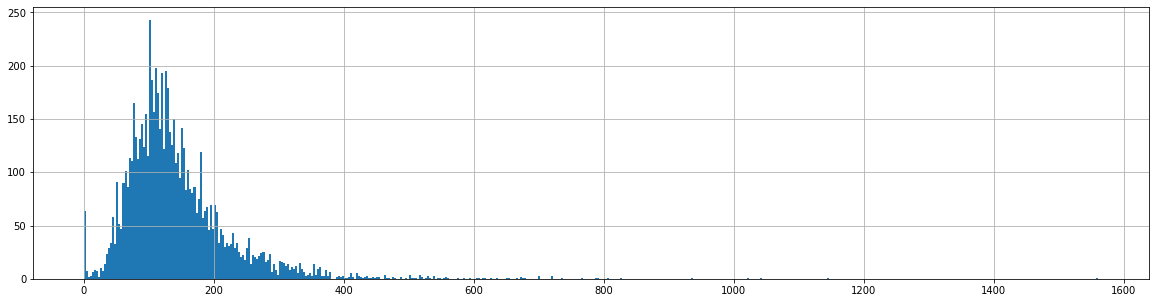

In [39]:
fig = plt.figure(figsize = (20,5))
df[(df['BuildingArea']<3000)]['BuildingArea'].hist(bins=500)
plt.show()

In [40]:
df['BuildingArea'].isnull().sum()

6450

In [41]:
df_final['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())

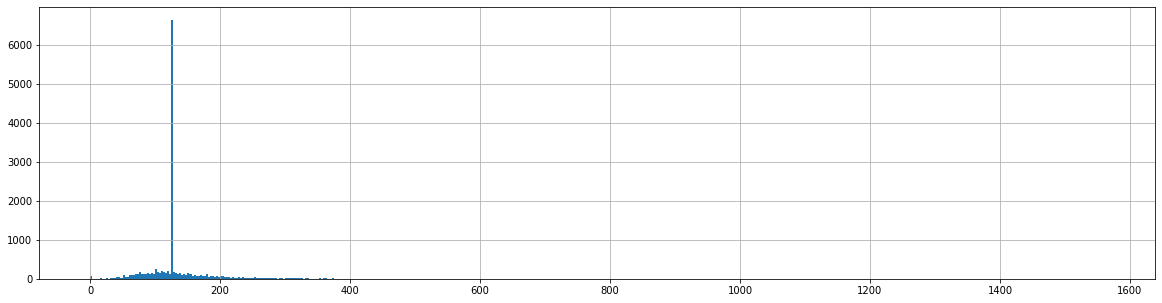

In [42]:
fig = plt.figure(figsize = (20,5))
df_final[(df_final['BuildingArea']<3000)]['BuildingArea'].hist(bins=500)
plt.show()

### We will look into Landsize and BuildingArea later.

### YearBuilt

In [43]:
print(df['YearBuilt'].mean())
print(df['YearBuilt'].median())
print(df['YearBuilt'].mode()[0])

1964.6842169408897
1970.0
1970.0


In [44]:
df['YearBuilt'].describe()

count    8205.000000
mean     1964.684217
std        37.273762
min      1196.000000
25%      1940.000000
50%      1970.000000
75%      1999.000000
max      2018.000000
Name: YearBuilt, dtype: float64

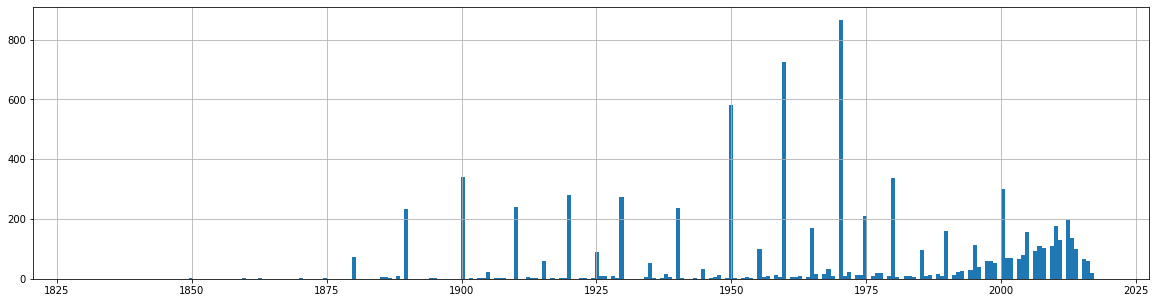

In [45]:
fig = plt.figure(figsize = (20,5))
df[(df['YearBuilt']>1200)]['YearBuilt'].hist(bins=250)
plt.show()

In [46]:
df_final['YearBuilt_Missing'] = np.where(df['YearBuilt'].isnull(), 1, 0)

In [47]:
df_final['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median()).astype(int)
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3032,PC_3204,PC_3056,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt_Missing,YearBuilt
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,2,1,1,202.0,126.0,1,1970
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,2,1,0,156.0,79.0,0,1900
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,3,2,0,134.0,150.0,0,1900
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,3,2,1,94.0,126.0,1,1970
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,3,1,2,120.0,142.0,0,2014


In [48]:
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3032,PC_3204,PC_3056,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt_Missing,YearBuilt
0,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,2,1,1,202.0,126.0,1,1970
1,2,0,0,1,0,0,0,2.5,0,0,...,0,0,0,2,1,0,156.0,79.0,0,1900
2,3,0,0,0,0,1,0,2.5,0,0,...,0,0,0,3,2,0,134.0,150.0,0,1900
3,3,0,0,0,0,0,0,2.5,0,0,...,0,0,0,3,2,1,94.0,126.0,1,1970
4,4,0,0,0,0,0,1,2.5,0,0,...,0,0,0,3,1,2,120.0,142.0,0,2014


### Latitude and Longitude

In [49]:
df_final['Latitude'] = df['Lattitude']
df_final['Longitude'] = df['Longtitude']
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,PC_3056,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt_Missing,YearBuilt,Latitude,Longitude
0,2,0,0,1,0,0,0,2.5,0,0,...,0,2,1,1,202.0,126.0,1,1970,-37.7996,144.9984
1,2,0,0,1,0,0,0,2.5,0,0,...,0,2,1,0,156.0,79.0,0,1900,-37.8079,144.9934
2,3,0,0,0,0,1,0,2.5,0,0,...,0,3,2,0,134.0,150.0,0,1900,-37.8093,144.9944
3,3,0,0,0,0,0,0,2.5,0,0,...,0,3,2,1,94.0,126.0,1,1970,-37.7969,144.9969
4,4,0,0,0,0,0,1,2.5,0,0,...,0,3,1,2,120.0,142.0,0,2014,-37.8072,144.9941


### RegionName

In [50]:
df_temp = pd.DataFrame()
df_temp['Regionname'] = df['Regionname']
df_temp = pd.get_dummies(df_temp, drop_first=True)
df_final[df_temp.columns] = df_temp[df_temp.columns]
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,YearBuilt,Latitude,Longitude,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,0,0,1,0,0,0,2.5,0,0,...,1970,-37.7996,144.9984,0,1,0,0,0,0,0
1,2,0,0,1,0,0,0,2.5,0,0,...,1900,-37.8079,144.9934,0,1,0,0,0,0,0
2,3,0,0,0,0,1,0,2.5,0,0,...,1900,-37.8093,144.9944,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,2.5,0,0,...,1970,-37.7969,144.9969,0,1,0,0,0,0,0
4,4,0,0,0,0,0,1,2.5,0,0,...,2014,-37.8072,144.9941,0,1,0,0,0,0,0


### Propertycount

In [51]:
df_final['Propertycount'] = df['Propertycount'].astype(int)
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,Latitude,Longitude,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Propertycount
0,2,0,0,1,0,0,0,2.5,0,0,...,-37.7996,144.9984,0,1,0,0,0,0,0,4019
1,2,0,0,1,0,0,0,2.5,0,0,...,-37.8079,144.9934,0,1,0,0,0,0,0,4019
2,3,0,0,0,0,1,0,2.5,0,0,...,-37.8093,144.9944,0,1,0,0,0,0,0,4019
3,3,0,0,0,0,0,0,2.5,0,0,...,-37.7969,144.9969,0,1,0,0,0,0,0,4019
4,4,0,0,0,0,0,1,2.5,0,0,...,-37.8072,144.9941,0,1,0,0,0,0,0,4019


### Price

In [52]:
df_final['Price'] = df['Price']
df_final.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,Longitude,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Propertycount,Price
0,2,0,0,1,0,0,0,2.5,0,0,...,144.9984,0,1,0,0,0,0,0,4019,1480000.0
1,2,0,0,1,0,0,0,2.5,0,0,...,144.9934,0,1,0,0,0,0,0,4019,1035000.0
2,3,0,0,0,0,1,0,2.5,0,0,...,144.9944,0,1,0,0,0,0,0,4019,1465000.0
3,3,0,0,0,0,0,0,2.5,0,0,...,144.9969,0,1,0,0,0,0,0,4019,850000.0
4,4,0,0,0,0,0,1,2.5,0,0,...,144.9941,0,1,0,0,0,0,0,4019,1600000.0


### Correlation HeatMap

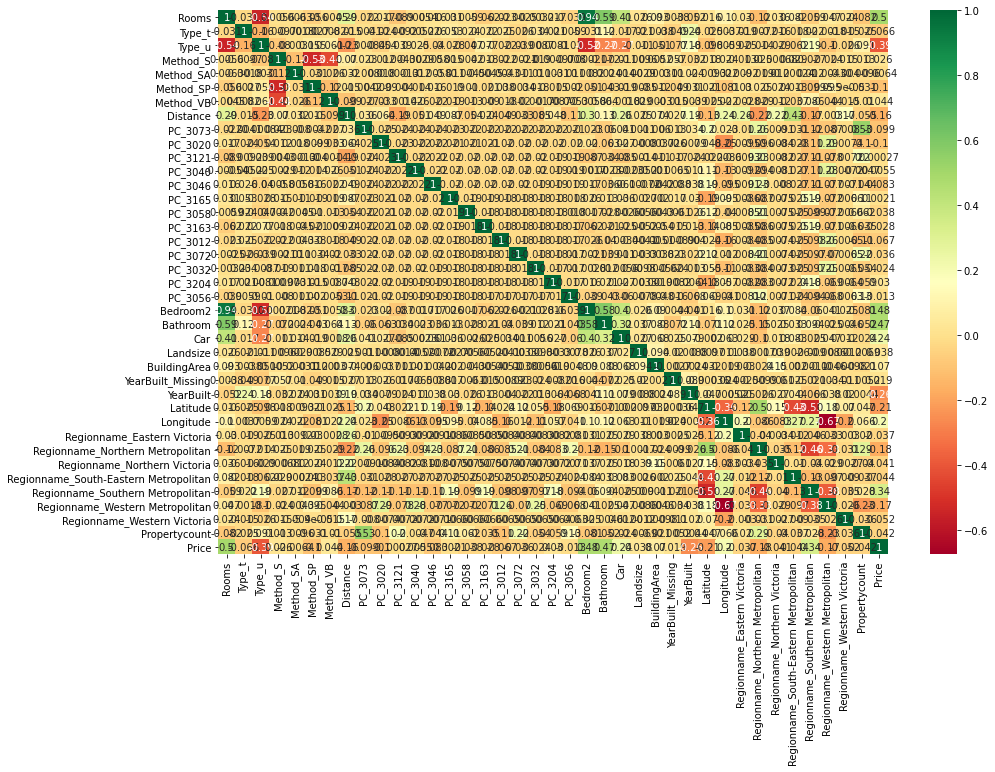

In [53]:
corrmat = df_final.corr()
plt.figure(figsize=(15, 10))
hm = sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

In [54]:
X = df_final.iloc[:,:-1]
y = df_final['Price']
X.head()

,Rooms,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Distance,PC_3073,PC_3020,...,Latitude,Longitude,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Propertycount
0,2,0,0,1,0,0,0,2.5,0,0,...,-37.7996,144.9984,0,1,0,0,0,0,0,4019
1,2,0,0,1,0,0,0,2.5,0,0,...,-37.8079,144.9934,0,1,0,0,0,0,0,4019
2,3,0,0,0,0,1,0,2.5,0,0,...,-37.8093,144.9944,0,1,0,0,0,0,0,4019
3,3,0,0,0,0,0,0,2.5,0,0,...,-37.7969,144.9969,0,1,0,0,0,0,0,4019
4,4,0,0,0,0,0,1,2.5,0,0,...,-37.8072,144.9941,0,1,0,0,0,0,0,4019


### Feature Importance

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

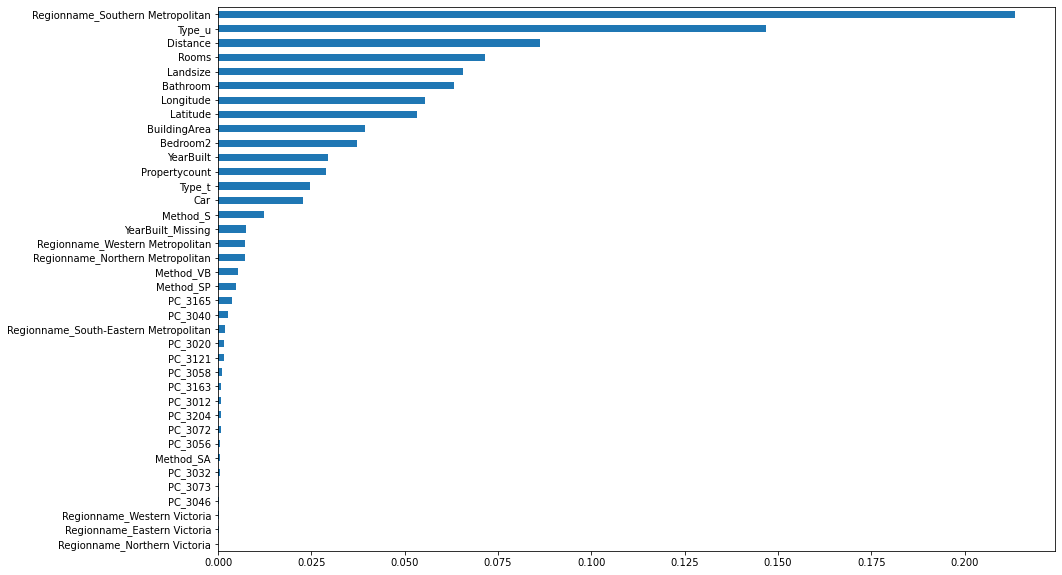

In [56]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(15, 10))
feat_imp.sort_values().plot(kind='barh')
plt.show()

### Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [58]:
print(train_x.shape)
print(test_x.shape)

(9506, 38)
(4074, 38)


### Model

In [4]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [68]:
rfr.fit(train_x, train_y)

RandomForestRegressor()

In [69]:
pred = rfr.predict(test_x)
pred

array([ 747915.  ,  996170.  , 2004155.  , ...,  743338.88,  733655.  ,
        837685.  ])

### Hyperparameter Tuning

In [77]:
# Hyperparameters

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=clf_rfr, param_distributions=params_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42)
rscv.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [90]:
pred = rscv.predict(test_x)
pred

array([ 350110.803     ,  641075.74522985, 1174134.53536493, ...,
       1028340.23742785, 1622979.13450892, 1819936.008     ])

### Model Evaluation

/home/sinjoy/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

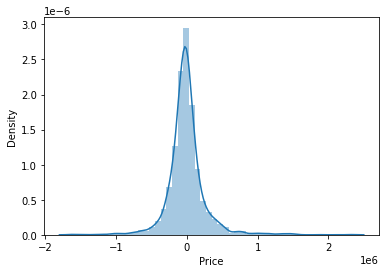

In [70]:
sns.distplot(test_y-pred)

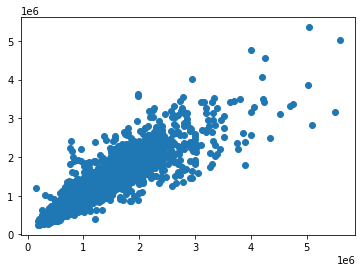

In [71]:
plt.scatter(test_y, pred)

In [73]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, pred)
mae

164853.65499392198

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, pred)
mse

71424291740.30771

In [79]:
import pickle
def save_model(filname, my_model):
    with open(filename, 'wb') as f:
        pickle.dump(my_model, f)

In [3]:
import pickle
def load_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [81]:
save_model('models/model_rfr.pkl', rfr)

In [85]:
with open("models/model_rfr.pkl", "wb") as pickleFile:
        pickle.dump(rfr, pickleFile)


In [103]:
#save_model('model_rfr_rscv.pkl')

In [6]:
loaded_model = load_model('models/model_rfr.pkl')

In [91]:
print(test_x.iloc[0])
rfr.predict([test_x.iloc[0]])

Rooms                                       2.0000
Type_t                                      0.0000
Type_u                                      1.0000
Method_S                                    1.0000
Method_SA                                   0.0000
Method_SP                                   0.0000
Method_VB                                   0.0000
Distance                                   11.2000
PC_3073                                     0.0000
PC_3020                                     0.0000
PC_3121                                     0.0000
PC_3040                                     0.0000
PC_3046                                     0.0000
PC_3165                                     0.0000
PC_3058                                     0.0000
PC_3163                                     0.0000
PC_3012                                     0.0000
PC_3072                                     0.0000
PC_3032                                     0.0000
PC_3204                        

array([747915.])

In [93]:
def onehot(values, cat):
    #values = ['S', 'SA', 'SP', 'VB']
    for v in values:
        if v==cat:
            v=1
        else:
            v=0
    
    return values

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [8]:
type(loaded_model.predict([[3, 0, 1, 1, 0, 0, 0, 5.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 5.0, 5.0, 0, 2010, 73.4, 75.4, 0, 0, 0, 0, 0, 1, 0, 5]])[0])

numpy.float64